In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [2]:
cars = pd.read_csv("final_cars.csv")

In [3]:
cars.columns

Index(['length', 'width', 'curb-weight', 'engine-size', 'horsepower',
       'city-mpg', 'price', 'fuel-type_diesel', 'fuel-type_gas',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd'],
      dtype='object')

In [4]:
cars.head()

,length,width,curb-weight,engine-size,horsepower,city-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,168.8,64.1,2548,130,111,21,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,168.8,64.1,2548,130,111,21,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,171.2,65.5,2823,152,154,19,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,176.6,66.2,2337,109,102,24,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,176.6,66.4,2824,136,115,18,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [5]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [6]:
X.shape,y.shape

((199, 18), (199,))

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

length                    -40
width                     882
curb-weight               -0
engine-size               80
horsepower                73
city-mpg                  7
fuel-type_diesel          604
fuel-type_gas             -604
num-of-doors_four         -29
num-of-doors_two          29
body-style_convertible    3922
body-style_hardtop        -289
body-style_hatchback      -1962
body-style_sedan          -302
body-style_wagon          -1369
drive-wheels_4wd          749
drive-wheels_fwd          -946
drive-wheels_rwd          197


In [13]:
model.intercept_

-53760.70825380572

### Calculate accuracy with train data

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  9620723.918222362
RMSE :  3101.7291819600177


In [24]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.84


### Test with test data

In [25]:
y_pred = model.predict(X_test)

In [26]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 11230784.48
Root Mean Squared Error : 3351.24
Mean Absolute Error : 2534.29
R2 Score: 0.83


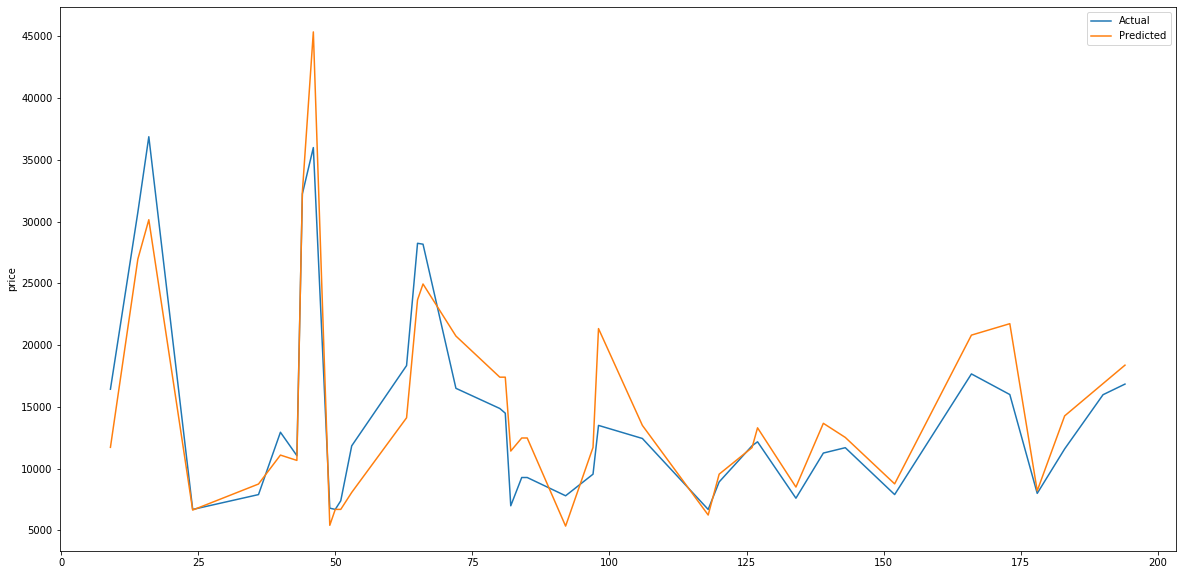

In [27]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [30]:
for p,a in zip(y_pred,y_test):
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f}")

  5344  -    7799 -  -2455
  6241  -    6692 -   -451
 21737  -   15998 -   5739
 23667  -   28248 -  -4581
 16887  -   15985 -    902
  5407  -    6795 -  -1388
 17406  -   14869 -   2537
 24952  -   28176 -  -3224
  8505  -    7603 -    902
 13668  -   11259 -   2409
  8750  -    7895 -    855
 45370  -   36000 -   9370
 20811  -   17669 -   3142
 11095  -   12945 -  -1850
  8202  -    7995 -    207
 18378  -   16845 -   1533
  6643  -    6692 -    -49
  8764  -    7898 -    866
 11723  -   16430 -  -4707
 13303  -   12170 -   1133
  9548  -    8921 -    627
 10664  -   11048 -   -384
 17405  -   14489 -   2916
  6696  -    6695 -      1
 14115  -   18344 -  -4229
  6696  -    7395 -   -699
 32390  -   32250 -    140
 12480  -    9279 -   3201
 21341  -   13499 -   7842
 12525  -   11694 -    831
 11422  -    6989 -   4433
 26967  -   30760 -  -3793
 12480  -    9279 -   3201
 14270  -   11595 -   2675
 13500  -   12440 -   1060
 11716  -    9549 -   2167
 20736  -   16503 -   4233
 

## Model with Normalization

In [31]:
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
y_pred = model.predict(X_test)

In [33]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 11230784.48
Root Mean Squared Error : 3351.24
Mean Absolute Error : 2534.29
R2 Score: 0.83


### Micro model with 2 features 

In [35]:
# Micro model
X_micro =  X[['engine-size','city-mpg']]
y_micro =  y

In [36]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [37]:
micro_model = LinearRegression(normalize=True)
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7710813762078876

In [39]:
y_micro_pred = micro_model.predict(X_micro_test)

In [41]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.85


## Regularization 

In [26]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score

In [27]:
lm = LassoCV(alphas=[0.10,0.5,1.0], cv=5, normalize=True)
lm.fit(X,y)

LassoCV(alphas=[0.1, 0.5, 1.0], copy_X=True, cv=5, eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=True, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [29]:
# Display coefficient for each column
for t in zip(X_train.columns, lm.coef_):
  print(f"{t[0]:25s} {t[1]}")

engine-size               94.90192356563755
horsepower                51.84457401896925
city-mpg                  -130.26334357430622
fuel-type_diesel          3025.7156531830283
fuel-type_gas             -1.197461207360927e-11
num-of-doors_four         355.97541408794484
num-of-doors_two          -0.0
body-style_convertible    2802.665990293213
body-style_hardtop        455.6302334363587
body-style_hatchback      -1216.1885874637012
body-style_sedan          0.0
body-style_wagon          -1091.0168097273513
drive-wheels_4wd          0.0
drive-wheels_fwd          -784.9444260913275
drive-wheels_rwd          1250.0912458063178


In [30]:
y_pred = lm.predict(X_test)

In [31]:
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.87


## RandomForestRegressor 

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.9763870088593243
R2 Score: 0.95


d:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


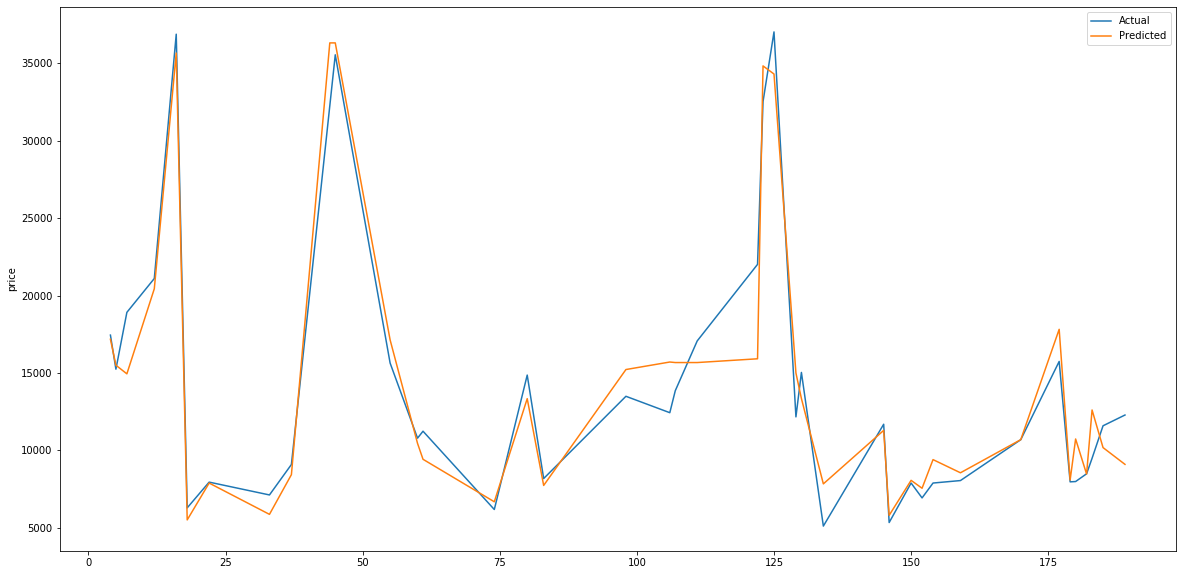

In [18]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [2]:
cars = pd.read_csv("final_cars.csv")

In [8]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score

In [99]:
cars.head()

,engine-size,horsepower,city-mpg,highway-mpg,price,fuel-type_diesel,fuel-type_gas,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,130,111.0,21,27,13495.0,0,1,0,1,1,0,0,0,0,0,0,1
1,130,111.0,21,27,16500.0,0,1,0,1,1,0,0,0,0,0,0,1
2,152,154.0,19,26,16500.0,0,1,0,1,0,0,1,0,0,0,0,1
3,109,102.0,24,30,13950.0,0,1,1,0,0,0,0,1,0,0,1,0
4,136,115.0,18,22,17450.0,0,1,1,0,0,0,0,1,0,1,0,0


In [4]:
# create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [5]:
## scale values
from sklearn.preprocessing import scale
X['engine-size'] = scale(X['engine-size'])
X['horsepower'] = scale(X['horsepower'])
X['city-mpg'] = scale(X['city-mpg'])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [13]:
model = SGDRegressor(random_state=100, penalty="l1")
model.fit(X_train,y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.8246795170649844
R2 Score: 0.82
